Let us first import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from keras_preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from PIL import Image
from keras.applications import imagenet_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

We will now plot a few images to check out our dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


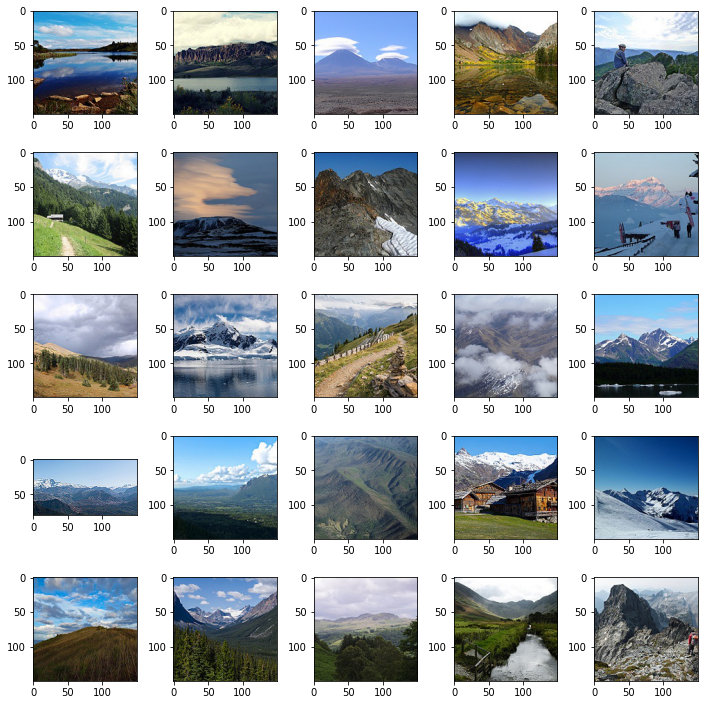

In [3]:
plt.figure(figsize=(10,10))
path = r'/content/drive/My Drive/images_dataset/mountain'

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path + r'/' + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)

We will now set a root directory for the dataset for storing all the folder names

In [4]:
dir = r'/content/drive/My Drive/images_dataset'
root_dir = listdir(dir)

In [5]:
# Creating two empty lists for images and their respective labels
image_list, label_list = [], []

Let us now focus on resizing the images to introduce uniformity. We will also begin appending the images and their respective labels to the two lists created above

In [6]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        img_path = f"{dir}/{directory}/{files}"
        img = Image.open(img_path)
        img = img.resize((150,150))
        img = img_to_array(img)
        image_list.append(img)
        label_list.append(directory)

In [7]:
labels = pd.DataFrame(label_list) # converting list into a pandas dataframe
labels.value_counts()

glacier      553
mountain     525
street       501
forest       474
sea          410
buildings    400
dtype: int64

In [8]:
print('We are working with {0} classes of images'.format(len(labels.value_counts())))

We are working with 6 classes of images


In [9]:
print('There are a total of {0} images in our dataset'.format(np.array(image_list).shape[0]))

There are a total of 2863 images in our dataset


In [10]:
print('All the images have now been resized to',np.array(image_list).shape[1:])

All the images have now been resized to (150, 150, 3)


In [11]:
# Let us now check the data shape of our label list
np.array(label_list).shape[0]

2863

Performing <b>train_test_split</b> on our data for our ML model

In [12]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [13]:
# Performing normalization
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0
x_train = x_train.reshape(-1,150,150,3)
x_test = x_test.reshape(-1,150,150,3)

Using <b>LabelBinarizer()</b> to one-hot-encode our y data

In [14]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

print('The list of classes are as follows:',lb.classes_)

The list of classes are as follows: ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [15]:
# Splitting the training data into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Creating our model architecture

In [16]:
model = Sequential([
    Conv2D(16, kernel_size= (3,3), input_shape = (150,150,3)),
    BatchNormalization(),
    LeakyReLU(),
    
    Conv2D(32, kernel_size= (3,3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(5,5),
    
    Conv2D(64, kernel_size= (3,3)),
    BatchNormalization(),
    LeakyReLU(),
    
    Conv2D(128, kernel_size= (3,3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(5,5),
    
    Flatten(),
    
    Dense(64),
    Dropout(rate=0.2),
    BatchNormalization(),
    LeakyReLU(),
    
    Dense(32),
    Dropout(rate=0.2),
    BatchNormalization(),
    LeakyReLU(1),
    
    Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

In [17]:
# Compiling our model

model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0005))

In [18]:
# Training our model

image_classifier_model = model.fit(x_train, y_train, batch_size = 128, epochs = 70, validation_data = (x_val, y_val))

Epoch 1/70
15/15 [==============================] - 19s 213ms/step - loss: 1.4274 - accuracy: 0.4574 - val_loss: 1.7695 - val_accuracy: 0.1572
Epoch 2/70
15/15 [==============================] - 2s 127ms/step - loss: 0.9891 - accuracy: 0.6457 - val_loss: 2.0085 - val_accuracy: 0.1310
Epoch 3/70
15/15 [==============================] - 2s 127ms/step - loss: 0.8145 - accuracy: 0.7200 - val_loss: 2.3590 - val_accuracy: 0.1310
Epoch 4/70
15/15 [==============================] - 2s 126ms/step - loss: 0.7270 - accuracy: 0.7489 - val_loss: 2.6412 - val_accuracy: 0.1310
Epoch 5/70
15/15 [==============================] - 2s 127ms/step - loss: 0.6280 - accuracy: 0.7893 - val_loss: 2.7045 - val_accuracy: 0.1310
Epoch 6/70
15/15 [==============================] - 2s 128ms/step - loss: 0.5403 - accuracy: 0.8297 - val_loss: 2.8121 - val_accuracy: 0.1310
Epoch 7/70
15/15 [==============================] - 2s 126ms/step - loss: 0.4592 - accuracy: 0.8663 - val_loss: 2.8264 - val_accuracy: 0.1310
Epoch

In [22]:
print('The accuracy achieved on our image classifier model is {0}%'.format(max(image_classifier_model.history['val_accuracy'])*100))

The accuracy achieved on our image classifier model is 78.16593647003174%


Let us now evaluate our model

In [23]:
y_pred = model.predict(x_test)

In [24]:
img = array_to_img(x_test[1])

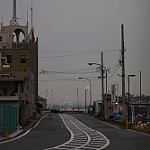

In [25]:
img

In [26]:
labels = lb.classes_
print(labels)

print('The image is labelled as',labels[np.argmax(y_test[1])])
print('The predicted label is',labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
The image is labelled as street
The predicted label is street
